In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [2]:
df = pd.read_csv('plot_data/FF_d7_Brain5xFAD_area_21Dec23.csv')
#drop unnamed column
df = df.drop(df.columns[0], axis=1)
#remove Cluster_Label column and Group Column
df.drop(['Cluster_Label', 'Group'], axis=1, inplace=True)
df

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Area,Area_RT,Area_Ratio,FAC,TG
0,[TG(52:5)]_FA16:1,11292023_DOD93_F4_5xFAD_dienc_O3on_01,n-7,788.7,599.5,12.24,586.0,788.7 -> 599.5,2344.0,0.000000,NaN,FA16:1,TG(52:5)
1,[TG(52:5)]_FA16:1,11292023_DOD94_F4_5xFAD_cereb_O3on_01,n-7,788.7,599.5,12.24,1418.0,788.7 -> 599.5,29574.0,0.177633,NaN,FA16:1,TG(52:5)
2,[TG(52:5)]_FA16:1,11292023_DOD94_F4_5xFAD_cortex_O3on_01,n-7,788.7,599.5,12.24,931.0,788.7 -> 599.5,13386.0,0.089067,NaN,FA16:1,TG(52:5)
3,[TG(52:5)]_FA16:1,11292023_FAD185_M1_5xFAD_cereb_O3on_01,n-7,788.7,599.5,12.24,1340.0,788.7 -> 599.5,27282.0,0.177633,NaN,FA16:1,TG(52:5)
4,[TG(52:5)]_FA16:1,11292023_FAD185_M1_5xFAD_cortex_O3on_01,n-7,788.7,599.5,12.28,2509.0,788.7 -> 599.5,48724.0,0.177633,NaN,FA16:1,TG(52:5)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,"[TG(57:9),TG(56:2)]_FA18:1",11292023_FAD185_M3_5xFAD_cereb_O3on_01,n-9,822.8,633.6,17.96,1145.0,822.8 -> 633.6,10100.0,0.088817,NaN,FA18:1,"TG(56:2), TG(57:9)"
111,"[TG(57:9),TG(56:2)]_FA18:1",11292023_FAD189_M2_5xFAD_cereb_O3on_01,n-9,822.8,633.6,17.96,581.0,822.8 -> 633.6,4365.0,0.088817,NaN,FA18:1,"TG(56:2), TG(57:9)"
112,"[TG(57:11),TG(56:4)]_FA18:1",11292023_FAD189_M1_5xFAD_cereb_O3on_01,n-9,818.7,629.5,15.83,1635.0,818.7 -> 629.5,22201.0,0.133483,NaN,FA18:1,"TG(56:4), TG(57:11)"
113,"[TG(57:11),TG(56:4)]_FA18:1",11292023_FAD189_M1_5xFAD_cortex_O3on_01,n-9,818.7,629.5,15.83,2394.0,818.7 -> 629.5,60912.0,0.177900,NaN,FA18:1,"TG(56:4), TG(57:11)"


Add Liver Brain label

In [3]:

# Define function to extract biology term
def extract_biology(sample_id):
    for term in ["liver", "cortex", "cereb", "hippo", "dienc"]:
        if term in sample_id.lower():
            return term
    return None

# Apply function to create new column
df['Biology'] = df['Sample_ID'].apply(extract_biology)
df['Genotype'] = df['Sample_ID'].apply(lambda x: '5xFAD' if 'WT' not in x else 'WT')

# df.to_csv('df_for_gpt.csv')

# Extracting the mouse name from the 'Sample_ID' column
df['Mouse'] = df['Sample_ID'].apply(lambda x: '_'.join(x.split('_')[1:3]))
df

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Area,Area_RT,Area_Ratio,FAC,TG,Biology,Genotype,Mouse
0,[TG(52:5)]_FA16:1,11292023_DOD93_F4_5xFAD_dienc_O3on_01,n-7,788.7,599.5,12.24,586.0,788.7 -> 599.5,2344.0,0.000000,NaN,FA16:1,TG(52:5),dienc,5xFAD,DOD93_F4
1,[TG(52:5)]_FA16:1,11292023_DOD94_F4_5xFAD_cereb_O3on_01,n-7,788.7,599.5,12.24,1418.0,788.7 -> 599.5,29574.0,0.177633,NaN,FA16:1,TG(52:5),cereb,5xFAD,DOD94_F4
2,[TG(52:5)]_FA16:1,11292023_DOD94_F4_5xFAD_cortex_O3on_01,n-7,788.7,599.5,12.24,931.0,788.7 -> 599.5,13386.0,0.089067,NaN,FA16:1,TG(52:5),cortex,5xFAD,DOD94_F4
3,[TG(52:5)]_FA16:1,11292023_FAD185_M1_5xFAD_cereb_O3on_01,n-7,788.7,599.5,12.24,1340.0,788.7 -> 599.5,27282.0,0.177633,NaN,FA16:1,TG(52:5),cereb,5xFAD,FAD185_M1
4,[TG(52:5)]_FA16:1,11292023_FAD185_M1_5xFAD_cortex_O3on_01,n-7,788.7,599.5,12.28,2509.0,788.7 -> 599.5,48724.0,0.177633,NaN,FA16:1,TG(52:5),cortex,5xFAD,FAD185_M1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,"[TG(57:9),TG(56:2)]_FA18:1",11292023_FAD185_M3_5xFAD_cereb_O3on_01,n-9,822.8,633.6,17.96,1145.0,822.8 -> 633.6,10100.0,0.088817,NaN,FA18:1,"TG(56:2), TG(57:9)",cereb,5xFAD,FAD185_M3
111,"[TG(57:9),TG(56:2)]_FA18:1",11292023_FAD189_M2_5xFAD_cereb_O3on_01,n-9,822.8,633.6,17.96,581.0,822.8 -> 633.6,4365.0,0.088817,NaN,FA18:1,"TG(56:2), TG(57:9)",cereb,5xFAD,FAD189_M2
112,"[TG(57:11),TG(56:4)]_FA18:1",11292023_FAD189_M1_5xFAD_cereb_O3on_01,n-9,818.7,629.5,15.83,1635.0,818.7 -> 629.5,22201.0,0.133483,NaN,FA18:1,"TG(56:4), TG(57:11)",cereb,5xFAD,FAD189_M1
113,"[TG(57:11),TG(56:4)]_FA18:1",11292023_FAD189_M1_5xFAD_cortex_O3on_01,n-9,818.7,629.5,15.83,2394.0,818.7 -> 629.5,60912.0,0.177900,NaN,FA18:1,"TG(56:4), TG(57:11)",cortex,5xFAD,FAD189_M1


In [4]:
df['SLBG_group'] = df.groupby(['Lipid', 'Sample_ID','Biology','Genotype']).ngroup()
# df['Lipid_Biology_group'] = df.groupby(['Lipid', 'Biology']).ngroup()
# Filter for 'liver' in Biology
# liver_df = df[df['Biology'] == 'liver']
# # Filter the DataFrame for each of the brain biology values and concatenate them into one DataFrame
# brain_df = pd.concat([
#     df[df['Biology'] == 'cortex'],
#     df[df['Biology'] == 'cereb'],
#     df[df['Biology'] == 'hippo'],
#     df[df['Biology'] == 'dienc']
# ])
# brain_df

# # Group by Lipid and db_pos
# liver_df['SLBG_group'] = liver_df.groupby(['Lipid', 'Sample_ID','Biology','Genotype']).ngroup()
# brain_df['SLBG_group'] = brain_df.groupby(['Lipid', 'Sample_ID','Biology','Genotype']).ngroup()



# Assuming df is your DataFrame

# Step 1: Extract the last part of the Lipid name
df['Lipid_End'] = df['Lipid'].str.extract(r'(FA\d+:\d+)$')

# Step 2: Sort the DataFrame
# We'll sort by the new 'Lipid_End' column, and then by the original 'Lipid' column to maintain order within each group
df = df.sort_values(by=['Lipid_End', 'Lipid'], ascending=[True, True])

# If you specifically want 'FA16:1' to appear before 'FA18:1'
# You might need a custom sorting function or a categorical type for the 'Lipid_End' column
df['Lipid_End'] = pd.Categorical(df['Lipid_End'], categories=['FA16:1', 'FA18:1'], ordered=True)
df = df.sort_values(by=['Lipid_End', 'Lipid'])

# df.to_csv('df_OzESI_labels.csv')

df

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Area,Area_RT,Area_Ratio,FAC,TG,Biology,Genotype,Mouse,SLBG_group,Lipid_End
0,[TG(52:5)]_FA16:1,11292023_DOD93_F4_5xFAD_dienc_O3on_01,n-7,788.7,599.5,12.24,586.0,788.7 -> 599.5,2344.0,0.000000,NaN,FA16:1,TG(52:5),dienc,5xFAD,DOD93_F4,13,FA16:1
1,[TG(52:5)]_FA16:1,11292023_DOD94_F4_5xFAD_cereb_O3on_01,n-7,788.7,599.5,12.24,1418.0,788.7 -> 599.5,29574.0,0.177633,NaN,FA16:1,TG(52:5),cereb,5xFAD,DOD94_F4,14,FA16:1
2,[TG(52:5)]_FA16:1,11292023_DOD94_F4_5xFAD_cortex_O3on_01,n-7,788.7,599.5,12.24,931.0,788.7 -> 599.5,13386.0,0.089067,NaN,FA16:1,TG(52:5),cortex,5xFAD,DOD94_F4,15,FA16:1
3,[TG(52:5)]_FA16:1,11292023_FAD185_M1_5xFAD_cereb_O3on_01,n-7,788.7,599.5,12.24,1340.0,788.7 -> 599.5,27282.0,0.177633,NaN,FA16:1,TG(52:5),cereb,5xFAD,FAD185_M1,16,FA16:1
4,[TG(52:5)]_FA16:1,11292023_FAD185_M1_5xFAD_cortex_O3on_01,n-7,788.7,599.5,12.28,2509.0,788.7 -> 599.5,48724.0,0.177633,NaN,FA16:1,TG(52:5),cortex,5xFAD,FAD185_M1,17,FA16:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,"[TG(57:11),TG(56:4)]_FA18:1",11292023_FAD189_M1_5xFAD_cortex_O3on_01,n-9,818.7,629.5,15.83,2394.0,818.7 -> 629.5,60912.0,0.177900,NaN,FA18:1,"TG(56:4), TG(57:11)",cortex,5xFAD,FAD189_M1,94,FA18:1
108,"[TG(57:9),TG(56:2)]_FA18:1",11292023_DOD93_F4_5xFAD_dienc_O3on_01,n-9,822.8,633.6,18.04,532.0,822.8 -> 633.6,2128.0,0.000000,NaN,FA18:1,"TG(56:2), TG(57:9)",dienc,5xFAD,DOD93_F4,95,FA18:1
109,"[TG(57:9),TG(56:2)]_FA18:1",11292023_FAD185_M1_5xFAD_cereb_O3on_01,n-9,822.8,633.6,18.09,538.0,822.8 -> 633.6,2152.0,0.000000,NaN,FA18:1,"TG(56:2), TG(57:9)",cereb,5xFAD,FAD185_M1,96,FA18:1
110,"[TG(57:9),TG(56:2)]_FA18:1",11292023_FAD185_M3_5xFAD_cereb_O3on_01,n-9,822.8,633.6,17.96,1145.0,822.8 -> 633.6,10100.0,0.088817,NaN,FA18:1,"TG(56:2), TG(57:9)",cereb,5xFAD,FAD185_M3,97,FA18:1


copy df to df2 to do db calcuations

In [5]:
# Copying df2 to create df3
df2 = df.copy()

# Displaying the first few rows of df3 with the new 'Total Intensity' column
df2


,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Area,Area_RT,Area_Ratio,FAC,TG,Biology,Genotype,Mouse,SLBG_group,Lipid_End
0,[TG(52:5)]_FA16:1,11292023_DOD93_F4_5xFAD_dienc_O3on_01,n-7,788.7,599.5,12.24,586.0,788.7 -> 599.5,2344.0,0.000000,NaN,FA16:1,TG(52:5),dienc,5xFAD,DOD93_F4,13,FA16:1
1,[TG(52:5)]_FA16:1,11292023_DOD94_F4_5xFAD_cereb_O3on_01,n-7,788.7,599.5,12.24,1418.0,788.7 -> 599.5,29574.0,0.177633,NaN,FA16:1,TG(52:5),cereb,5xFAD,DOD94_F4,14,FA16:1
2,[TG(52:5)]_FA16:1,11292023_DOD94_F4_5xFAD_cortex_O3on_01,n-7,788.7,599.5,12.24,931.0,788.7 -> 599.5,13386.0,0.089067,NaN,FA16:1,TG(52:5),cortex,5xFAD,DOD94_F4,15,FA16:1
3,[TG(52:5)]_FA16:1,11292023_FAD185_M1_5xFAD_cereb_O3on_01,n-7,788.7,599.5,12.24,1340.0,788.7 -> 599.5,27282.0,0.177633,NaN,FA16:1,TG(52:5),cereb,5xFAD,FAD185_M1,16,FA16:1
4,[TG(52:5)]_FA16:1,11292023_FAD185_M1_5xFAD_cortex_O3on_01,n-7,788.7,599.5,12.28,2509.0,788.7 -> 599.5,48724.0,0.177633,NaN,FA16:1,TG(52:5),cortex,5xFAD,FAD185_M1,17,FA16:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,"[TG(57:11),TG(56:4)]_FA18:1",11292023_FAD189_M1_5xFAD_cortex_O3on_01,n-9,818.7,629.5,15.83,2394.0,818.7 -> 629.5,60912.0,0.177900,NaN,FA18:1,"TG(56:4), TG(57:11)",cortex,5xFAD,FAD189_M1,94,FA18:1
108,"[TG(57:9),TG(56:2)]_FA18:1",11292023_DOD93_F4_5xFAD_dienc_O3on_01,n-9,822.8,633.6,18.04,532.0,822.8 -> 633.6,2128.0,0.000000,NaN,FA18:1,"TG(56:2), TG(57:9)",dienc,5xFAD,DOD93_F4,95,FA18:1
109,"[TG(57:9),TG(56:2)]_FA18:1",11292023_FAD185_M1_5xFAD_cereb_O3on_01,n-9,822.8,633.6,18.09,538.0,822.8 -> 633.6,2152.0,0.000000,NaN,FA18:1,"TG(56:2), TG(57:9)",cereb,5xFAD,FAD185_M1,96,FA18:1
110,"[TG(57:9),TG(56:2)]_FA18:1",11292023_FAD185_M3_5xFAD_cereb_O3on_01,n-9,822.8,633.6,17.96,1145.0,822.8 -> 633.6,10100.0,0.088817,NaN,FA18:1,"TG(56:2), TG(57:9)",cereb,5xFAD,FAD185_M3,97,FA18:1


Whole Brain 5xFAD pipeline 5xFAD 5xFAD 5xFAD 5xFAD 5xFAD 5xFAD 5xFAD 5xFAD 5xFAD 5xFAD 5xFAD 5xFAD 5xFAD 5xFAD 5xFAD

In [13]:
import pandas as pd

# Assuming df2 is your original DataFrame
# df2 = pd.read_csv('path_to_your_data.csv') # Uncomment and modify this line to load your data

# Filtering for 5xFAD Genotype
df_5xFAD = df2[df2['Genotype'] == '5xFAD']

# Step 1: Filter for non-liver samples and rename to df_brain_5xFAD
df_brain_5xFAD = df_5xFAD[df_5xFAD['Biology'] != 'liver']
df_brain_5xFAD_cereb = df_brain_5xFAD[df_brain_5xFAD['Biology'] == 'cereb']
df_brain_5xFAD_cortex = df_brain_5xFAD[df_brain_5xFAD['Biology'] == 'cortex']
df_brain_5xFAD_hippo = df_brain_5xFAD[df_brain_5xFAD['Biology'] == 'hippo']
df_brain_5xFAD_dienc = df_brain_5xFAD[df_brain_5xFAD['Biology'] == 'dienc']

# # Step 2: Create and fill n-7, n-9, n-10, n-12 columns in df_brain_5xFAD
# for col in ['n-7', 'n-9', 'n-10', 'n-12']:
#     df_brain_5xFAD[col] = df_brain_5xFAD.apply(lambda x: x['Area'] if x['db'] == col else 0, axis=1)

# # Step 3: Group by 'Lipid' and sum up the n columns in df_brain_5xFAD2
# df_brain_5xFAD2 = df_brain_5xFAD.groupby('Lipid')[['n-7', 'n-9', 'n-10', 'n-12']].sum().round(0).reset_index()

# # Step 4: Calculate total intensity and relative intensities in df_brain_5xFAD2
# df_brain_5xFAD2['Total_Intensity'] = df_brain_5xFAD2[['n-7', 'n-9', 'n-10', 'n-12']].sum(axis=1)

# for col in ['n-7', 'n-9', 'n-10', 'n-12']:
#     df_brain_5xFAD2[col + '%'] = ((df_brain_5xFAD2[col] / df_brain_5xFAD2['Total_Intensity']) * 100).round(1)

def process_n_percent(df):
    # Create and fill n-7, n-9, n-10, n-12 columns
    for col in ['n-7', 'n-9', 'n-10', 'n-12']:
        df[col] = df.apply(lambda x: x['Area'] if x['db'] == col else 0, axis=1)

    # Group by 'Lipid' and sum up the n columns
    df_grouped = df.groupby('Lipid')[['n-7', 'n-9', 'n-10', 'n-12']].sum().round(0).reset_index()

    # Calculate total intensity
    df_grouped['Total_Intensity'] = df_grouped[['n-7', 'n-9', 'n-10', 'n-12']].sum(axis=1)

    # Calculate relative intensities
    for col in ['n-7', 'n-9', 'n-10', 'n-12']:
        df_grouped[col + '%'] = ((df_grouped[col] / df_grouped['Total_Intensity']) * 100).round(1)

    # Return the new dataframe
    return df_grouped

#Example usage:
df_brain_5xFAD2 = process_n_percent(df_brain_5xFAD)
df_brain_5xFAD_cereb2 = process_n_percent(df_brain_5xFAD_cereb)
df_brain_5xFAD_cortex2 = process_n_percent(df_brain_5xFAD_cortex)
df_brain_5xFAD_hippo2 = process_n_percent(df_brain_5xFAD_hippo)
df_brain_5xFAD_dienc2 = process_n_percent(df_brain_5xFAD_dienc)



# Display the final DataFrame df_brain_5xFAD2
df_brain_5xFAD2
df_brain_5xFAD_cereb2
df_brain_5xFAD_cortex2
df_brain_5xFAD_hippo2
df_brain_5xFAD_dienc2


/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Lipid,n-7,n-9,n-10,n-12,Total_Intensity,n-7%,n-9%,n-10%,n-12%
0,[TG(50:3)]_FA18:1,0.0,129023.0,0,0,129023.0,0.0,100.0,0.0,0.0
1,[TG(52:5)]_FA16:1,704623.0,18802.0,0,0,723425.0,97.4,2.6,0.0,0.0
2,[TG(54:5)]_FA18:1,20534.0,727602.0,0,0,748136.0,2.7,97.3,0.0,0.0
3,[TG(54:6)]_FA18:1,0.0,39413.0,0,0,39413.0,0.0,100.0,0.0,0.0
4,"[TG(55:10),TG(54:3)]_FA18:1",26628.0,1426311.0,0,0,1452939.0,1.8,98.2,0.0,0.0
5,"[TG(55:11),TG(54:4)]_FA18:1",46471.0,819807.0,0,0,866278.0,5.4,94.6,0.0,0.0
6,"[TG(55:8),TG(54:1)]_FA18:1",0.0,11224.0,0,0,11224.0,0.0,100.0,0.0,0.0
7,"[TG(55:9),TG(54:2)]_FA18:1",0.0,187277.0,0,0,187277.0,0.0,100.0,0.0,0.0
8,"[TG(56:7),]_FA18:1",0.0,2315.0,0,0,2315.0,0.0,100.0,0.0,0.0
9,"[TG(57:11),TG(56:4)]_FA18:1",0.0,22201.0,0,0,22201.0,0.0,100.0,0.0,0.0


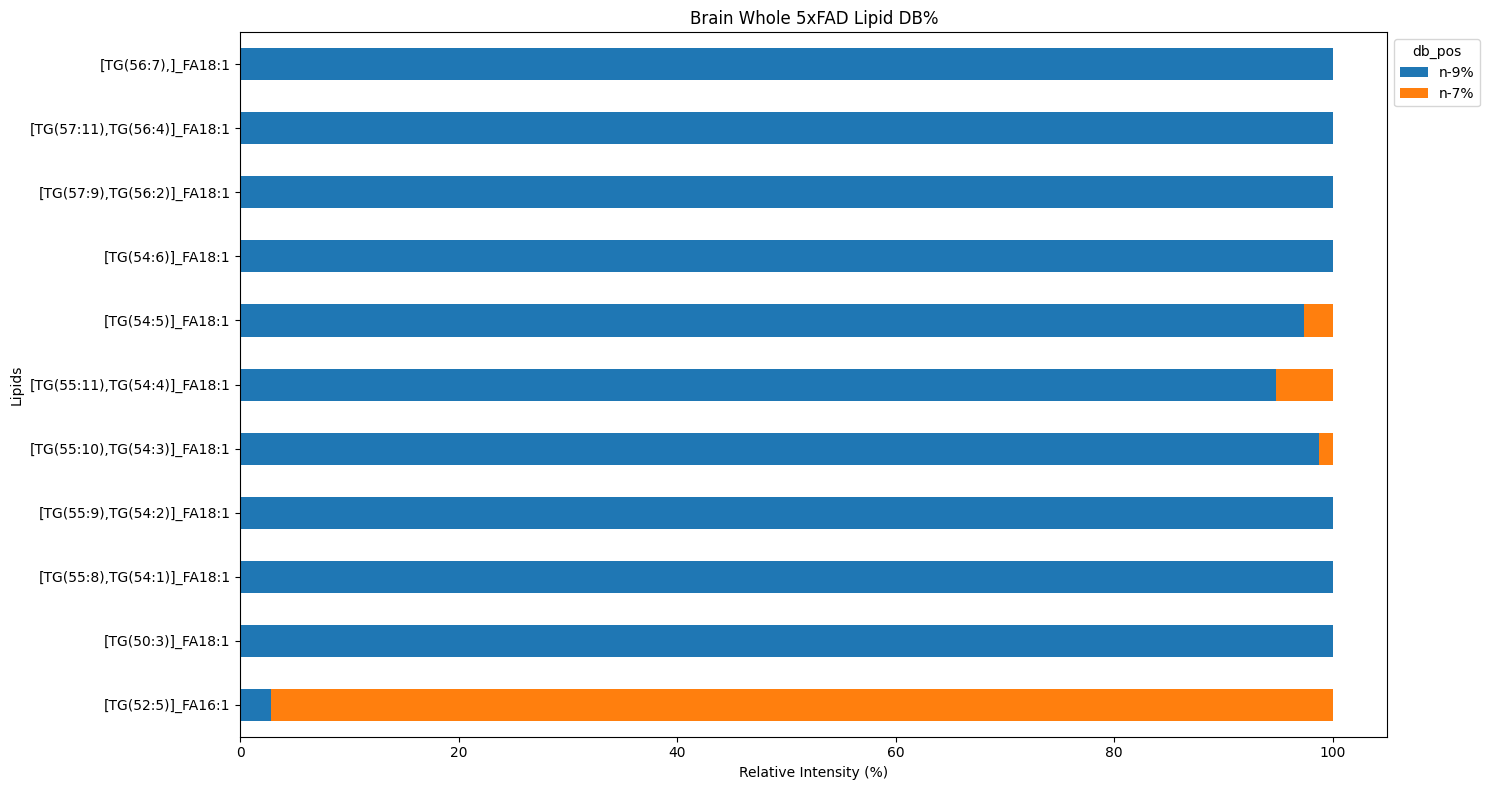

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Assuming df_brain_5xFAD3 is your DataFrame
# df_brain_5xFAD3 = pd.read_csv('path_to_your_data.csv') # Uncomment and modify this line to load your data
df_brain_5xFAD3 = df_brain_5xFAD2.copy()

# Function to generate a combined sorting key
def combined_sort_key(lipid):
    fa16_1_key = '0' if 'FA16:1' in lipid else '1'
    tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
    tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))
    return fa16_1_key + tg_list_sorted + lipid

# Reshape the DataFrame and create pivot table for plotting
reshaped_df_5xFAD = df_brain_5xFAD3.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db_pos', value_name='Percentage')
pivot_df_5xFAD = reshaped_df_5xFAD.pivot_table(index='Lipid', columns='db_pos', values='Percentage', aggfunc='sum')[['n-9%', 'n-7%']]

# Apply the combined sorting function to the Lipid index to create a sorting key
pivot_df_5xFAD['Combined_Sort_Key'] = pivot_df_5xFAD.index.to_series().apply(combined_sort_key)

# Sort the DataFrame by the combined sorting key
pivot_df_5xFAD = pivot_df_5xFAD.sort_values(by='Combined_Sort_Key')

# Drop the combined sorting key column
pivot_df_5xFAD.drop('Combined_Sort_Key', axis=1, inplace=True)

# Plotting
pivot_df_5xFAD.plot(kind='barh', stacked=True, figsize=(15, 8))
plt.xlabel('Relative Intensity (%)')
plt.ylabel('Lipids')
plt.title('Brain Whole 5xFAD Lipid DB%')
plt.legend(title='db_pos', loc='upper left', bbox_to_anchor=(1, 1))

# # Saving the plot as a PNG file
# plt.savefig('Barstack_area/WholeBrain_5xFAD_Area.png', dpi=300, bbox_inches='tight')
# #save as pdf
# plt.savefig('Barstack_area/WholeBrain_5xFAD_Area.pdf', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


Brain REGIONS 5xFAD

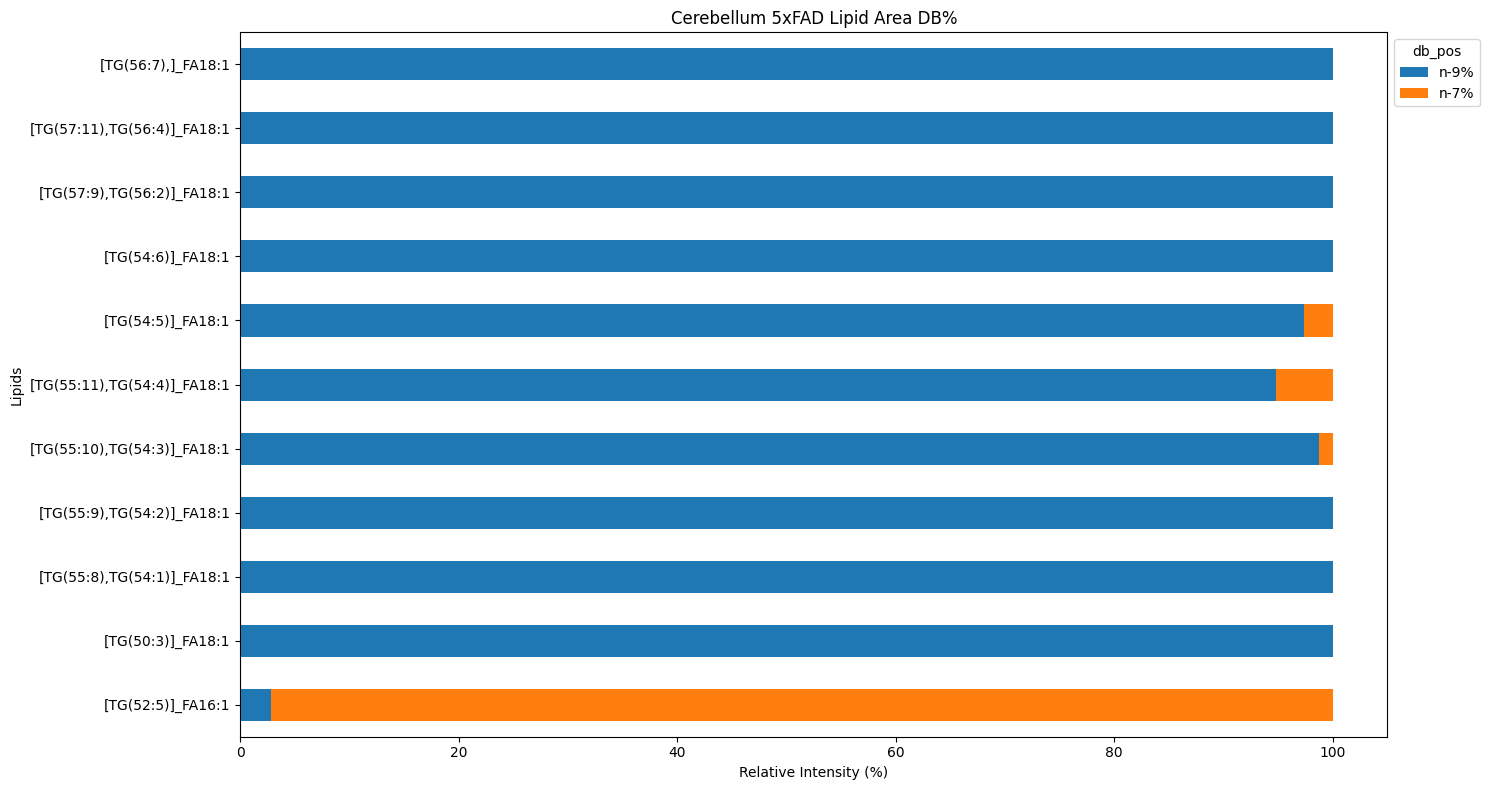

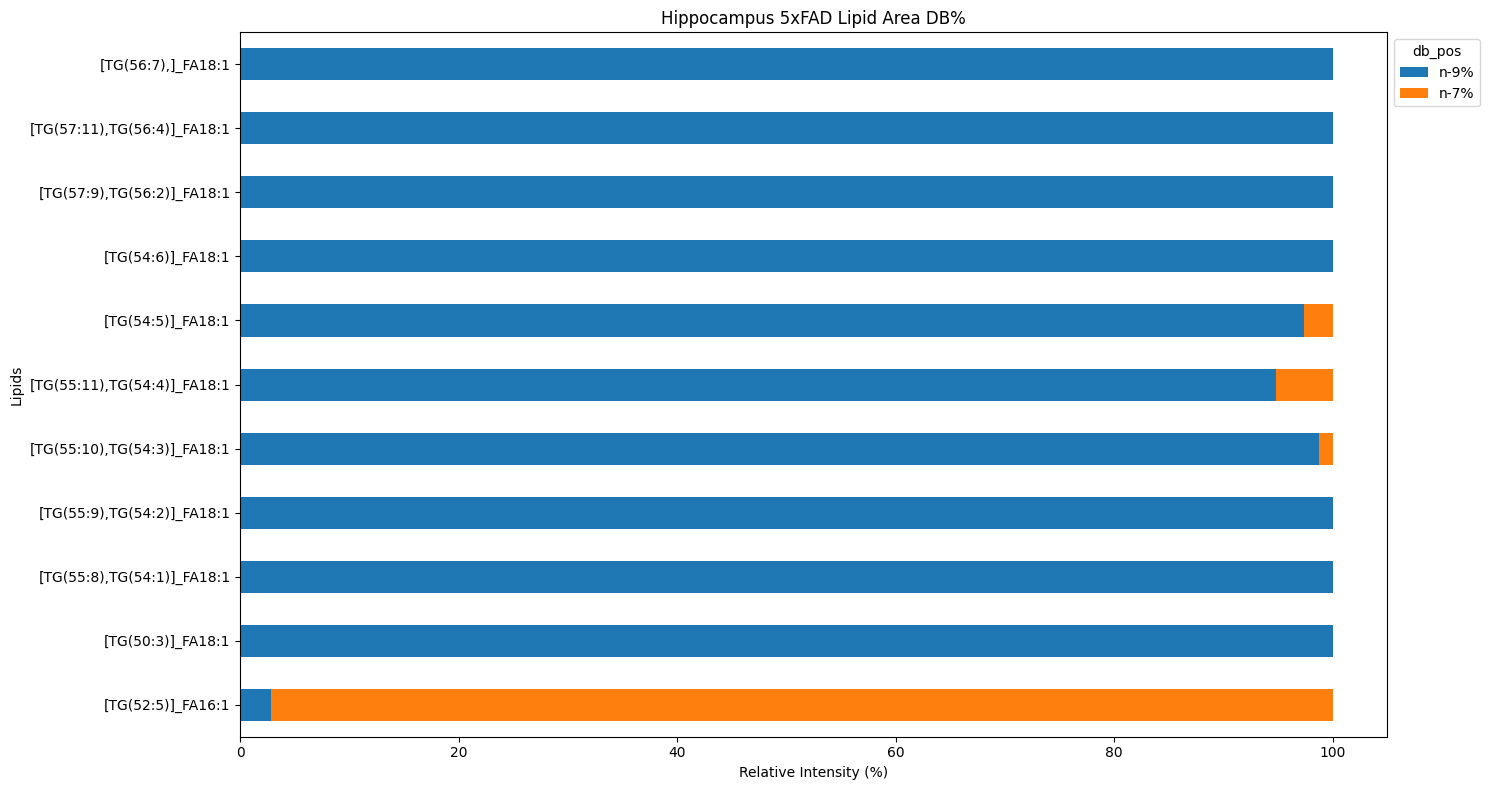

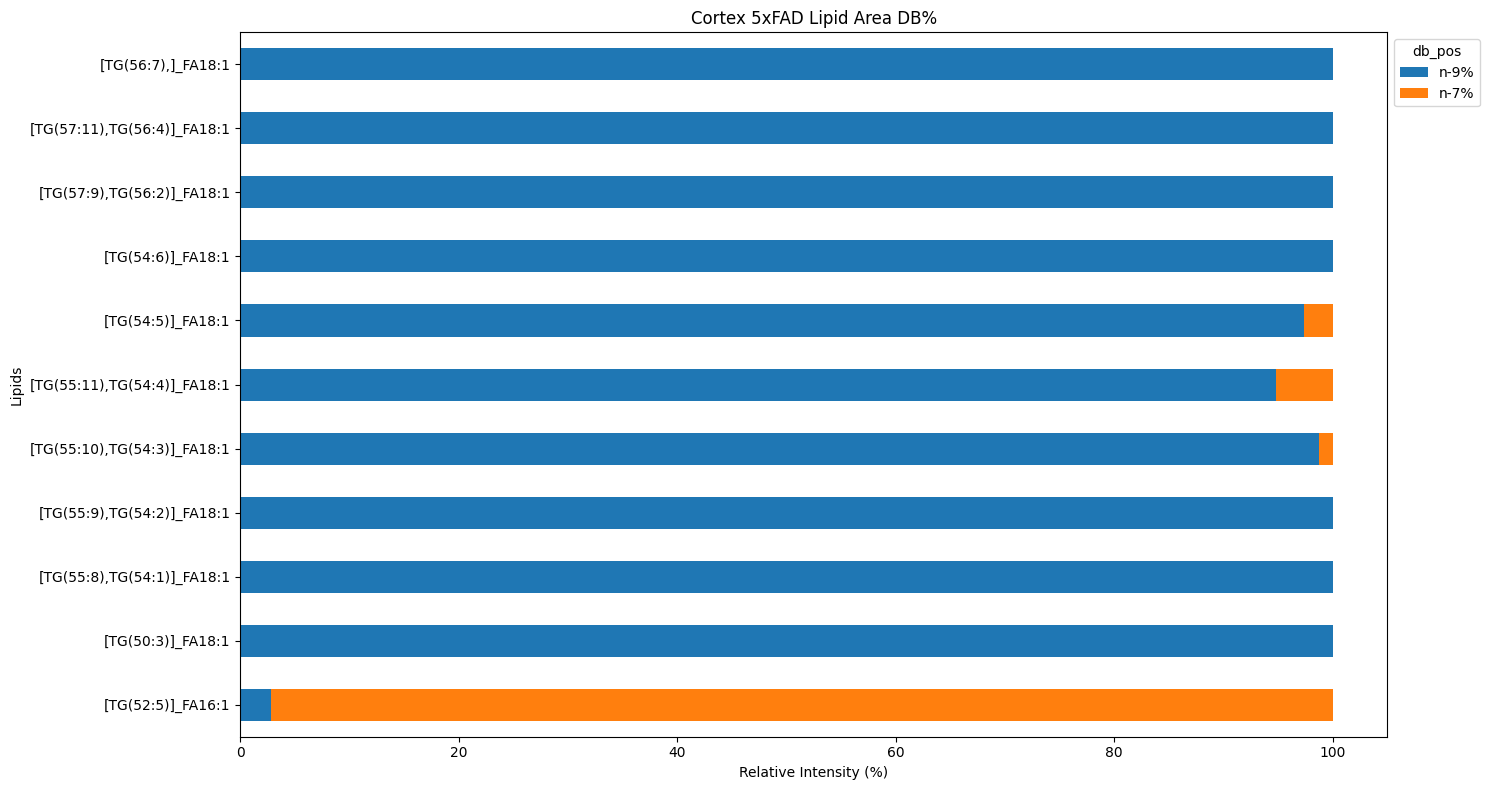

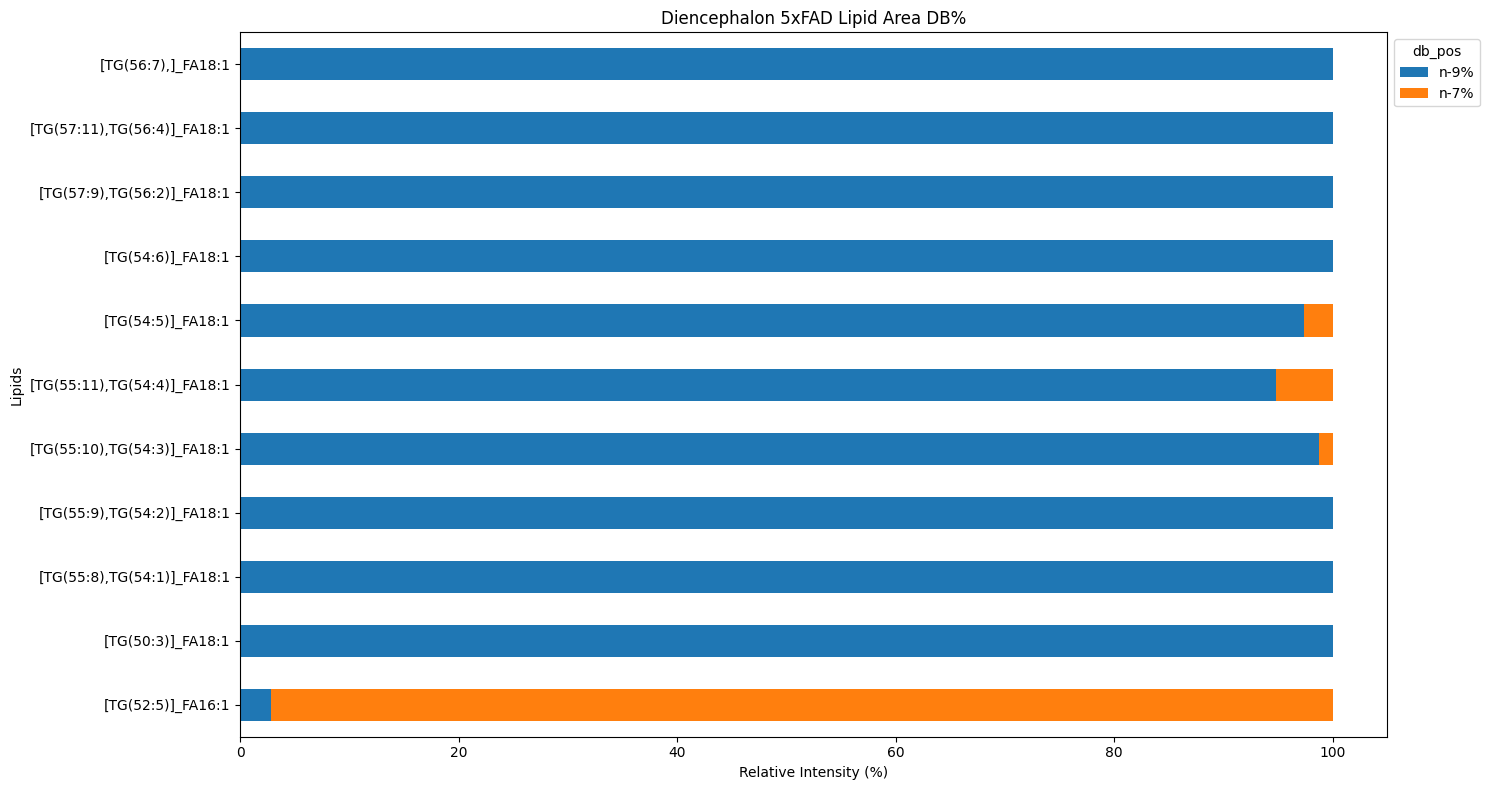

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import re

def combined_sort_key(lipid):
    fa16_1_key = '0' if 'FA16:1' in lipid else '1'
    tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
    tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))
    return fa16_1_key + tg_list_sorted + lipid

def plot_brain_region_5xFAD(df, region_name):
    # # Calculate percentages
    # for col in ['n-7', 'n-9', 'n-10', 'n-12']:
    #     df[col + '%'] = ((df[col] / df['Total Intensity']) * 100).round(1)

    # Reshape the DataFrame
    reshaped_df = df.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db_pos', value_name='Percentage')

    # Create pivot table
    pivot_df = reshaped_df.pivot_table(index='Lipid', columns='db_pos', values='Percentage', aggfunc='sum')[['n-9%', 'n-7%']]

    # Apply the combined sorting function to the Lipid index to create a sorting key
    pivot_df['Combined_Sort_Key'] = pivot_df.index.to_series().apply(combined_sort_key)

    # Sort the DataFrame by the combined sorting key
    pivot_df = pivot_df.sort_values(by='Combined_Sort_Key')

    # Drop the combined sorting key column
    pivot_df.drop('Combined_Sort_Key', axis=1, inplace=True)

    # Plotting
    pivot_df.plot(kind='barh', stacked=True, figsize=(15, 8))
    plt.xlabel('Relative Intensity (%)')
    plt.ylabel('Lipids')
    plt.title(f'{region_name} 5xFAD Lipid Area DB%')
    plt.legend(title='db_pos', loc='upper left', bbox_to_anchor=(1, 1))

    # Saving the plot
    plt.savefig(f'Barstack_area/{region_name}_5xFAD_Area.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'Barstack_area/{region_name}_5xFAD_Area.pdf', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

# Example usage
plot_brain_region_5xFAD(df_brain_5xFAD2, 'Cerebellum')
plot_brain_region_5xFAD(df_brain_5xFAD2, 'Hippocampus')
plot_brain_region_5xFAD(df_brain_5xFAD2, 'Cortex')
plot_brain_region_5xFAD(df_brain_5xFAD2, 'Diencephalon')
